<a href="https://colab.research.google.com/github/yadgire7/Machine-Learning/blob/master/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Saurabh Arun Yadgire
USC ID: 8065527198
Github ID:yadgire7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
from scipy.io import arff
from sklearn import pipeline,linear_model,metrics,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import random

## Resources used:
    1. https://stackoverflow.com/questions/27264426/arff-files-with-scikit-learn
    2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
    3. https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

# Read data

In [5]:
# 1.a
data = arff.loadarff(r"/content/drive/MyDrive/DSCI552/all_homewroks/homework-1-yadgire7/Data/myData.arff")
# print(data)
df = pd.DataFrame(data[0])
df.head()

df['class']=df['class'].map({b'Abnormal':1,b'Normal': 0})
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

In [6]:
df['class'].size

310

# Visualize pairwise interaction

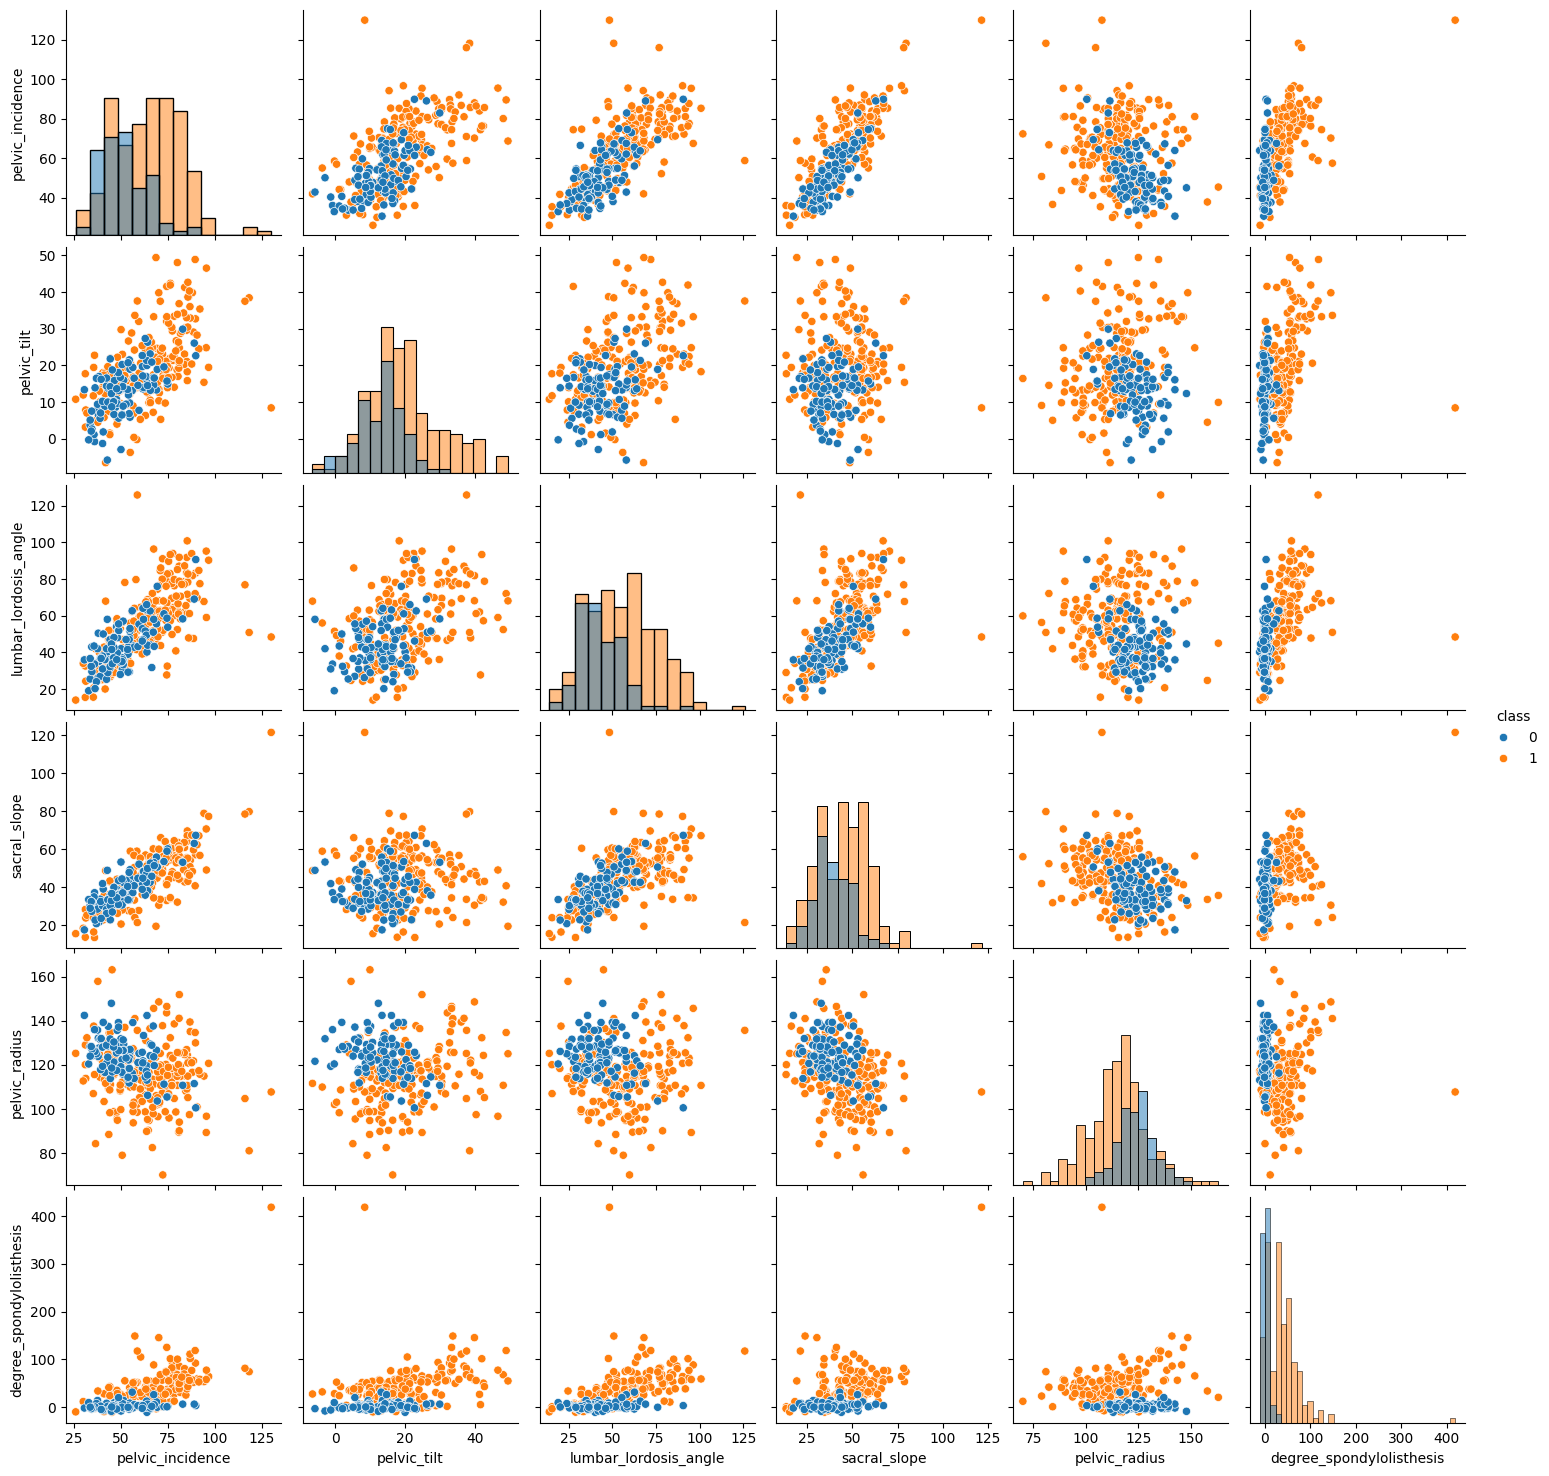

In [7]:
# 1.b.i
pair_plt=sbn.pairplot(df,hue="class",height=2.5,diag_kind="hist")

In [8]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

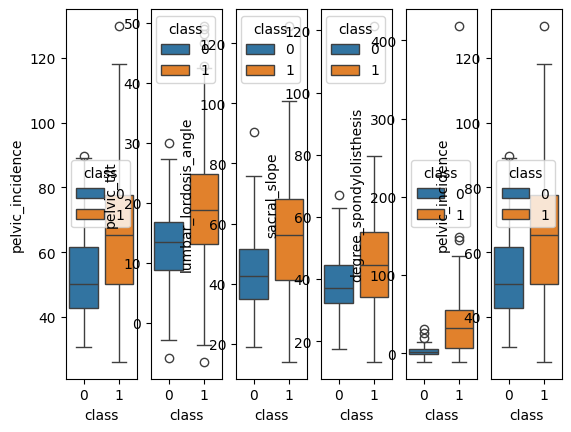

In [9]:
# 1.b.ii
fig,axes=plt.subplots(1,6)
# fig.legends
b1=sbn.boxplot(y='pelvic_incidence',x='class',data=df,ax=axes[0],orient='v',hue= 'class')
b2=sbn.boxplot(y='pelvic_tilt',x='class',data=df,ax=axes[1],orient='v',hue= 'class')
b3=sbn.boxplot(y='lumbar_lordosis_angle',x='class',data=df,ax=axes[2],orient='v',hue= 'class')
b4=sbn.boxplot(y='sacral_slope',x='class',data=df,ax=axes[3],orient='v',hue= 'class')
b5=sbn.boxplot(y='degree_spondylolisthesis',x='class',data=df,ax=axes[4],orient='v',hue= 'class')
b6=sbn.boxplot(y='pelvic_incidence',x='class',data=df,ax=axes[5],orient='v',hue= 'class')

In [10]:
# 1.b.iii
abnorm_df=df[df['class']==1]
norm_df=df[df['class']==0]
train_df=norm_df[0:70].append(abnorm_df[0:140])
x_train=train_df.iloc[:,0:-1]
y_train=train_df.iloc[:,6]
y_train.reset_index(drop=True,inplace=True)
print(len(x_train))
test_df = norm_df[70:].append(abnorm_df[140:])
x_test=test_df.iloc[:,0:-1]
y_test=test_df.iloc[:,6]
y_test.reset_index(drop=True,inplace=True)


210


<ipython-input-10-e4695a5ff4a4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df=norm_df[0:70].append(abnorm_df[0:140])
<ipython-input-10-e4695a5ff4a4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = norm_df[70:].append(abnorm_df[140:])


[1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


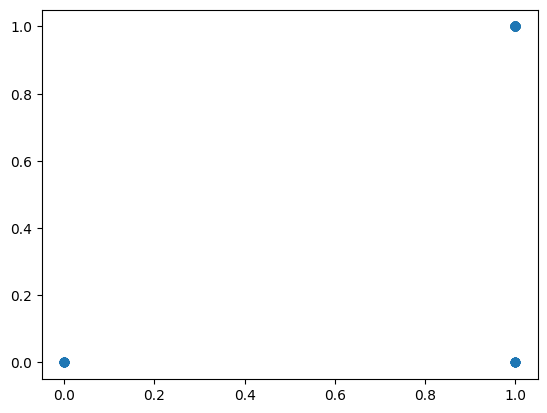

In [11]:
# 1.c.i
mod= KNeighborsClassifier().fit(x_train,y_train)
pred = mod.predict(x_test)
print(pred)
plt.scatter(pred,y_test)   #k=5(default,p=2 means euclidian metric)

In [12]:
# 1.c.ii
'''
as neither the train nor the test data has 208 entries, therefore
using the complete dataset for .fit() and then .predict() on created training
and testing data separately to calculte the errrors
'''

ks=[x for x in range(208,1,-3)]
# print(len(ks))
train_err=[]
test_err=[]

for i in range(0,len(ks)):
    mod_new= KNeighborsClassifier(n_neighbors=ks[i],metric='euclidean')
    mod_new.fit(x_train,y_train)
    pred_train=mod_new.predict(x_train)
    pred_train=pd.DataFrame(pred_train)
    pred_test = mod_new.predict(x_test)
    train_err.append(1-(metrics.average_precision_score(y_train,pred_train)))
    test_err.append(1-(metrics.average_precision_score(y_test,pred_test)))
# print(test_err)
err_metrics=pd.DataFrame()
err_metrics.insert(0,'k_values',ks)
err_metrics.insert(1,'train_err',train_err)
err_metrics.insert(2,'test_err',test_err)
print(err_metrics)
# print(err_metrics['test_err'].min())
ideal_k= err_metrics.index[err_metrics['test_err']==err_metrics['test_err'].min()]  #min test error
ideal_k=ideal_k[0]
k=int(err_metrics.loc[ideal_k][0])  # k for min test error



    k_values  train_err  test_err
0        208   0.333333  0.300000
1        205   0.333333  0.300000
2        202   0.333333  0.300000
3        199   0.333333  0.300000
4        196   0.333333  0.300000
..       ...        ...       ...
64        16   0.141607  0.113924
65        13   0.144482  0.146341
66        10   0.126777  0.125000
67         7   0.147619  0.146341
68         4   0.097892  0.070888

[69 rows x 3 columns]


# Plot Confusion Meatrix

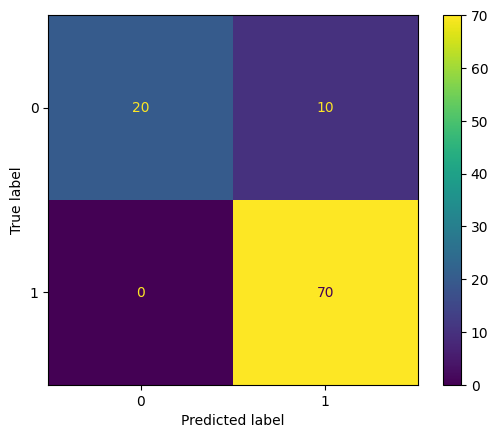

f1 Score =  0.9333333333333333


In [13]:
con_mod=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
mod.fit(x_train,y_train)
con_y=mod.predict(x_test)
con_mat=metrics.confusion_matrix(y_test,con_y)
f1=metrics.f1_score(y_test,con_y)
con_display=metrics.ConfusionMatrixDisplay(con_mat)
con_display.plot()
plt.show()
print('f1 Score = ',f1)

1.c.iii


<ipython-input-14-da67e666d1d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_train_data=train_df=norm_df[0:int(N/3)].append(abnorm_df[0:int(N-(N/3)+1)])
<ipython-input-14-da67e666d1d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_train_data=train_df=norm_df[0:int(N/3)].append(abnorm_df[0:int(N-(N/3)+1)])
<ipython-input-14-da67e666d1d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_train_data=train_df=norm_df[0:int(N/3)].append(abnorm_df[0:int(N-(N/3)+1)])
<ipython-input-14-da67e666d1d7>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_train_data=train_df=norm_df[0:int(N/3)].append(abnorm_df[0:int(N-(N/3)+1

0.10256410256410253


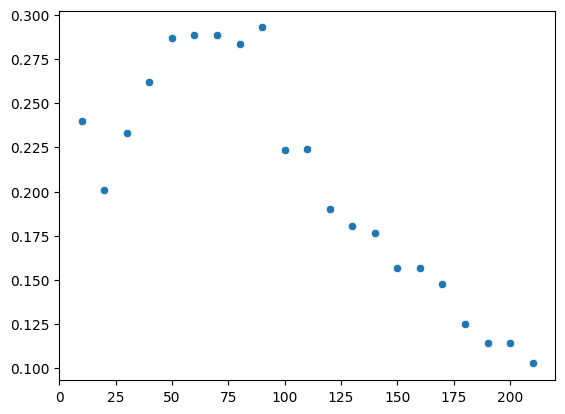

In [14]:
print('1.c.iii')

n=[]
new_ks=[]
k_err=[]
fin_N=[]
fin_err=[]
for i in range(10,220,10):
    n.append(i)
for j in range(1,201,5):
    new_ks.append(j)

# print(new_ks)

for N in n:
    new_train_data=train_df=norm_df[0:int(N/3)].append(abnorm_df[0:int(N-(N/3)+1)])
    new_x_train=new_train_data.iloc[:,0:-1]
    new_y_train=new_train_data.iloc[:,6]
    r=new_train_data.index.size

    for K in new_ks:
        myMod= KNeighborsClassifier(n_neighbors=K,metric='euclidean')
        if K<=r:
            myMod.fit(new_x_train,new_y_train)
            newPred=myMod.predict(x_test)
            newErr=1-(metrics.average_precision_score(y_test,newPred))
            k_err.append((K,newErr))
        else:
            break
        finK,err=min(k_err,key = lambda x:x[1])

    fin_N.append(N)
    fin_err.append(err)
    k_err.clear()
print(min(fin_err))
p=sbn.scatterplot(x=fin_N,y=fin_err)

In [15]:
print('1.d.i.A')
man_err=[]
p_err=[]
c_err=[]
m_err=[]

p_arr=np.arange(0.0,1.1,0.1)
for a in range(0,len(p_arr)):
    p_arr[a]=p_arr[a].round(2)
# print(p_arr)

sum_arr=[]
for kay_man in new_ks:
    man_mod=KNeighborsClassifier(n_neighbors=kay_man,p=1)
    man_mod.fit(x_train,y_train)
    man_pred =man_mod.predict(x_test)
    man_err.append((kay_man,(1-(metrics.average_precision_score(y_test,man_pred)))))
finalK,fin_err=min(man_err,key = lambda x:x[1])
sum_arr.append((finalK,fin_err))
print('Best K = ',finalK)
# print(new_metric_df)

print('1.d.i.B')
for P in p_arr:
    p_mod=KNeighborsClassifier(n_neighbors=finalK,metric='cosine',p=P)
    p_mod.fit(x_train,y_train)
    p_pred =p_mod.predict(x_test)
    p_err.append((P,(1-(metrics.average_precision_score(y_test,p_pred)))))

finalP,fin_err_p=min(p_err,key = lambda x:x[1])
print("Best P =",finalP)

print('1.d.i.C')
for kay_c in new_ks:
    c_mod=KNeighborsClassifier(n_neighbors=kay_c,metric='chebyshev')
    c_mod.fit(x_train,y_train)
    c_pred =c_mod.predict(x_test)
# print(c_pred)
    c_err.append((kay_c,(1-(metrics.average_precision_score(y_test,c_pred)))))
finalK,fin_err=min(c_err,key = lambda x:x[1])
sum_arr.append((finalK,fin_err))

# print(sum_arr)
print(c_mod.get_params())


print('1.d.ii')
for kay_m in new_ks:
    m_mod=KNeighborsClassifier(n_neighbors=kay_m,metric='mahalanobis',metric_params={'VI': np.cov(x_train,rowvar =False)})
    m_mod.fit(x_train,y_train)
    m_pred =m_mod.predict(x_test)
    m_err.append((kay_m,(1-(metrics.average_precision_score(y_test,m_pred)))))
finalK,fin_err=min(m_err,key = lambda x:x[1])
sum_arr.append((finalK,fin_err))
sum_df=pd.DataFrame(sum_arr,columns=['K','error rate'])
print(sum_df)
# print(sum_arr)



1.d.i.A
Best K =  6
1.d.i.B


InvalidParameterError: The 'p' parameter of KNeighborsClassifier must be a float in the range (0, inf] or None. Got 0.0 instead.

In [16]:
print('1.e')
man_err=[]
# p_err=[]
c_err=[]
m_err=[]
k_err=[]

sum_arr_e=[]

for K in new_ks:
    myMod= KNeighborsClassifier(n_neighbors=K,metric='euclidean',weights='distance')
    myMod.fit(new_x_train,new_y_train)
    newPred=myMod.predict(x_test)
    newErr=1-(metrics.average_precision_score(y_test,newPred))
    k_err.append((K,newErr))
finK,err=min(k_err,key = lambda x:x[1])
sum_arr_e.append((finalK,fin_err))

for kay_man in new_ks:
    man_mod=KNeighborsClassifier(n_neighbors=kay_man,p=1,weights='distance')
    man_mod.fit(x_train,y_train)
    man_pred =man_mod.predict(x_test)
    man_err.append((kay_man,(1-(metrics.average_precision_score(y_test,man_pred)))))
finalK,fin_err=min(man_err,key = lambda x:x[1])
sum_arr_e.append((finalK,fin_err))
print('Best K = ',finalK)
# print(new_metric_df)


for kay_c in new_ks:
    c_mod=KNeighborsClassifier(n_neighbors=kay_c,metric='chebyshev',weights='distance')
    c_mod.fit(x_train,y_train)
    c_pred =c_mod.predict(x_test)
# print(c_pred)
    c_err.append((kay_c,(1-(metrics.average_precision_score(y_test,c_pred)))))
finalK,fin_err=min(c_err,key = lambda x:x[1])
sum_arr_e.append((finalK,fin_err))

# print(sum_arr)
# print(c_mod.get_params())

sum_df_e=pd.DataFrame(sum_arr_e,columns=['K','error rate'])
print(sum_df_e)


1.e
Best K =  26
    K  error rate
0   6    0.114952
1  26    0.118022
2  31    0.129060


In [18]:
print('1.e')

print('The minimum error was found for euclidian metric with k=4 (0.070888)')

1.e
The minimum error was found for euclidian metric with k=4 (0.070888)
